In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

from time_series_extractor import *
from SubjectMagicFeatures import *
from plots import *

LOAD s22 from frontiers
pig


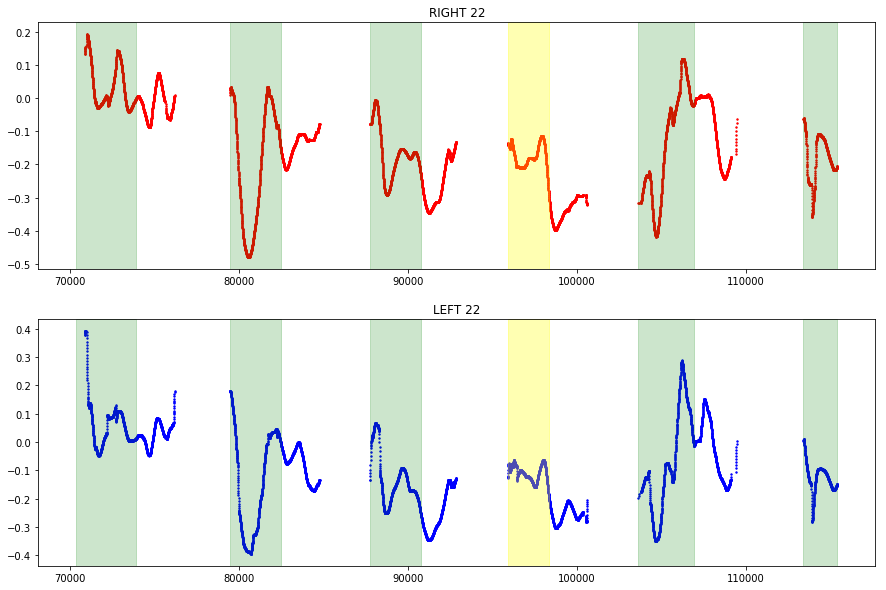

In [2]:
subject = 22
card_names = ['unicorn', 'pepper', 'minion', 'pig', 'hedge', 'aliens']

eye_df, annot_dfs, baseline, overall_eye_df, \
            cards_eye_dfs, early_sr, late_sr = \
                loadTimeSeries(subject, card_names, clean=True, smooth=True)

subject_card = getSubjectCard(subject, subject_cards_file)
print(subject_card)

overall_eye_df = referToBaseline(overall_eye_df, baseline)    
    
fig = plotPupilDilationTimeSeries(subject, card_names, subject_card,
                                  overall_eye_df, cards_eye_dfs)
plt.show()

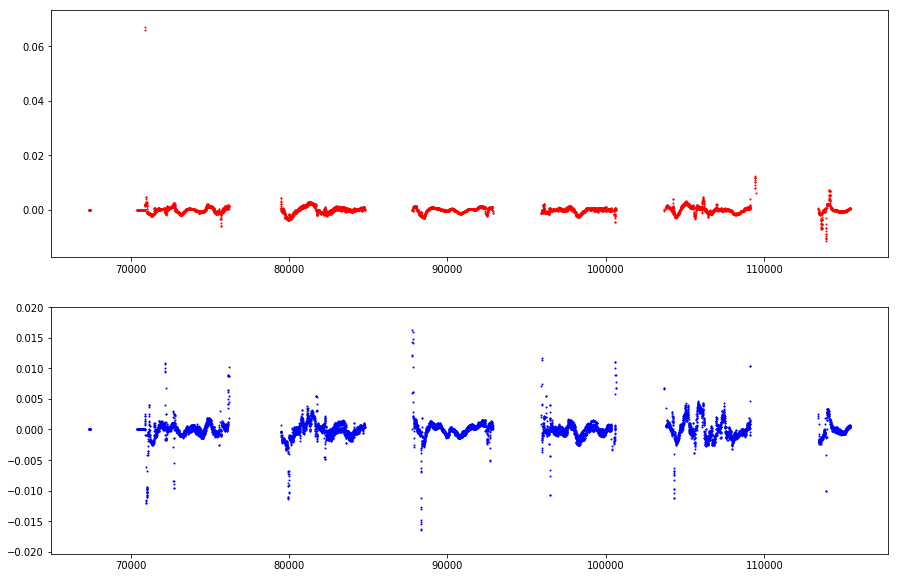

In [15]:
rl_eye = overall_eye_df[["dt_index", "timestamp", "diam_right", "diam_left"]].fillna(0)
slope_r = pd.Series(np.gradient(rl_eye["diam_right"].values), rl_eye.index, name='slope_right')
slope_l = pd.Series(np.gradient(rl_eye["diam_left"].values), rl_eye.index, name='slope_left')

df = pd.concat([rl_eye, slope_r, slope_l], axis=1)
df = cleanTimeSeries(df, col_right="slope_right", col_left="slope_left", tresh=0.01)

fig1, ass1 = plt.subplots(2, figsize=(15, 10))    
ass1[0].scatter(df['timestamp'],aaa['slope_right'], s=1, c='r')
ass1[1].scatter(df['timestamp'],aaa['slope_left'], s=1, c='b')
plt.show()